# Problem Statement - Original Case Study -  Part 1
It is now time to start using everything you have learned in the first half of this class. You will begin developing your own original analysis case study.

Start by providing a brief narrative describing an original idea for an analysis/model building problem. Find appropriate data for your case study.

Create some graphs to begin your graphical analysis and write the step-by-step instructions for completing the graphical analysis of your case study. Keep in mind that your analysis may look very different from the tutorial analysis. Your analysis should be adapted to fit your problem.

Submit your entire Case Study Part I including your narrative, data, notebook (if applicable), and any code to the submission link. 
Post Part I of your case study, excluding any code, to the Case Study Part I discussion forum.

# Solution : Original Case Study - Part 1

The data has been pulled from Kaggle Link below
https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews


## Context
This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with "retailer".

## Content
This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

1. Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
2. Age: Positive Integer variable of the reviewers age.
3. Title: String variable for the title of the review.
4. Review Text: String variable for the review body.
5. Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
6. Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
7. Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
8. Division Name: Categorical name of the product high level division.
9. Department Name: Categorical name of the product department name.
10. Class Name: Categorical name of the product class name.


## Abstract
Understanding sentiments of the customers is of huge importance in marketing strategies today. Be it retail, banking, insurance or any sector, if we or a business is not targetting the right group or customer segment, we may be overspending on marketing. Not only analyzing this gives companies an insight as to how customers perceive their products and/or services, but also gives them an idea on how to improve their offers. This study attempts to understand the correlation of different variables in customer reviews on a women clothing e-commerce, and to classify each review whether it recommends the reviewed product or not and whether it consists of positive, negative, or neutral sentiment. 

To achieve these goals, we will utilize different techniques used in our class so far and will improve the study with each passing week. We will be analyzing the data for recommendation and sentiment classification. 

## Introduction
As a part of this study, I would be studying the effect of parameters such as Age, Positive Feedback Count, Review Text Word Count, Ratings on the Recommended Ind. This would help me in understanding, if a clothing ID is more prone to be recommended by a customer based on these parameters or not. By being able to do so, I will be able to understand, how or what offers can I provide for customers to provide some feedbacks, which would in turn let me understand the performance of a particular clothing id which we can further translate into how many we need to manufacture. The idea is to manufacture or procure more of the materials which are recommended and try to price them in a manner to gain max profits. 


In [1]:
#pip install wordcloud

In [2]:
# importing required libraries
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
#from wordcloud import WordCloud, STOPWORDS
import yellowbrick

In [3]:
# Loading the data
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [4]:
# Cleaning up the data.
# dropping first column as it doesn't seem to have any relevant information, just the count
# Also removing the rows, if certain values are null. Assuming them as mandatory, 
# without which we will not be able to analyze.
for column in ["Division Name","Department Name","Class Name","Review Text"]:
    df = df[df[column].notnull()]
df.drop(df.columns[0], inplace=True, axis=1)

In [5]:
# Checking the shape
df.shape

(22628, 10)

In [6]:
df.head(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [7]:
# Adding a label, to identify positive and negative reviews.
# Assuming anything greater than 3 as positive.
df['Label'] = 0

In [8]:
df.loc[df.Rating >= 3, ['Label']] = 1

In [9]:
# Split review text to see number of words in each review.
df['Word Count'] = df['Review Text'].str.split().apply(len)

In [10]:
df.sample(5)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Label,Word Count
18112,1008,32,A little hippy but beautiful design,"I got the orange motif skirt in s. i'm 5'3"" an...",4,1,0,General Petite,Bottoms,Skirts,1,86
1060,1083,54,"Great dress, not for me",I love byron lars. very taken with his fabrics...,4,1,0,General Petite,Dresses,Dresses,1,96
4420,1078,38,NaN,This dress is very comfy and soft. i am return...,5,1,0,General Petite,Dresses,Dresses,1,23
20839,1078,23,Great maxi dress,"I love this dress. as a petite woman, it's har...",4,1,0,General,Dresses,Dresses,1,100
11632,983,34,Great little jacket,Ordered this in my normal size large in taupe....,5,1,0,General,Jackets,Jackets,1,42


In [11]:
# Below statistics describe the data and details about it.
df.describe().T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
Clothing ID,919.695908,201.683804,1.0,861.0,936.0,1078.0,1205.0
Age,43.282880,12.328176,18.0,34.0,41.0,52.0,99.0
Rating,4.183092,1.115911,1.0,4.0,5.0,5.0,5.0
Recommended IND,0.818764,0.385222,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,2.631784,5.787520,0.0,0.0,1.0,3.0,122.0
Label,0.895263,0.306222,0.0,1.0,1.0,1.0,1.0
Word Count,60.211950,28.533053,2.0,36.0,59.0,88.0,115.0


In [12]:
df[['Title', 'Division Name', 'Department Name', 'Class Name']].describe(include=['O']).T.drop('count', axis=1)

,unique,top,freq
Title,13983,Love it!,136
Division Name,3,General,13365
Department Name,6,Tops,10048
Class Name,20,Dresses,6145


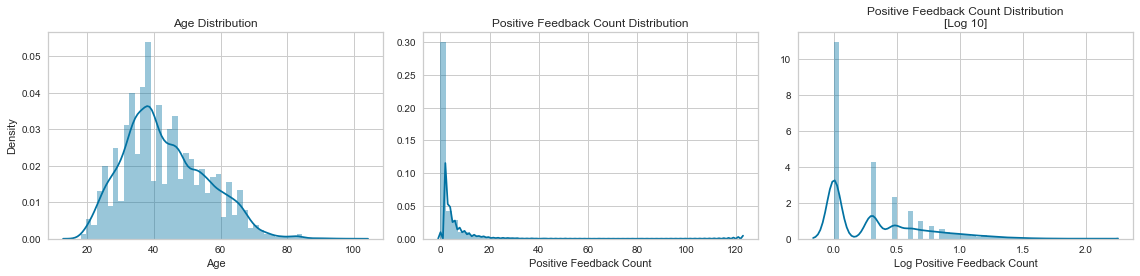

In [13]:
#Age and Positive Feedback Frequency Distributions
f, ax = plt.subplots(1, 3, figsize=(16, 4), sharey=False)
sns.distplot(df.Age, ax=ax[0])
ax[0].set_title('Age Distribution')
ax[0].set_ylabel('Density')
sns.distplot(df['Positive Feedback Count'], ax=ax[1])
ax[1].set_title('Positive Feedback Count Distribution')
sns.distplot(np.log10((df['Positive Feedback Count'][df['Positive Feedback Count'].notnull()] + 1)), ax=ax[2])
ax[2].set_title('Positive Feedback Count Distribution\n[Log 10]')
ax[2].set_xlabel('Log Positive Feedback Count')
plt.rcParams.update({'font.size': 12})
plt.tight_layout()
plt.savefig('age-and-positive-feedback-freqdist.png', format='png', dpi=600)
plt.show()

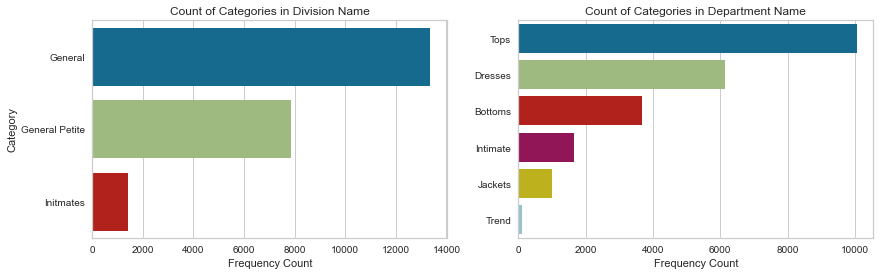

In [14]:
# Division and Department Distributions
# Plotting the data based on Division wise and Department wise distributions of this dataset.
row_plots = ['Division Name', 'Department Name']
f, axes = plt.subplots(1, len(row_plots), figsize=(14, 4), sharex=False)

for i, x in enumerate(row_plots):
    sns.countplot(y=x, data=df, order=df[x].value_counts().index, ax=axes[i])
    axes[i].set_title('Count of Categories in {}'.format(x))
    axes[i].set_xlabel('')
    axes[i].set_xlabel('Frequency Count')
axes[0].set_ylabel('Category')
axes[1].set_ylabel('')
plt.savefig('divname-and-deptname-freqdist.png', format='png', dpi=600)
plt.show()

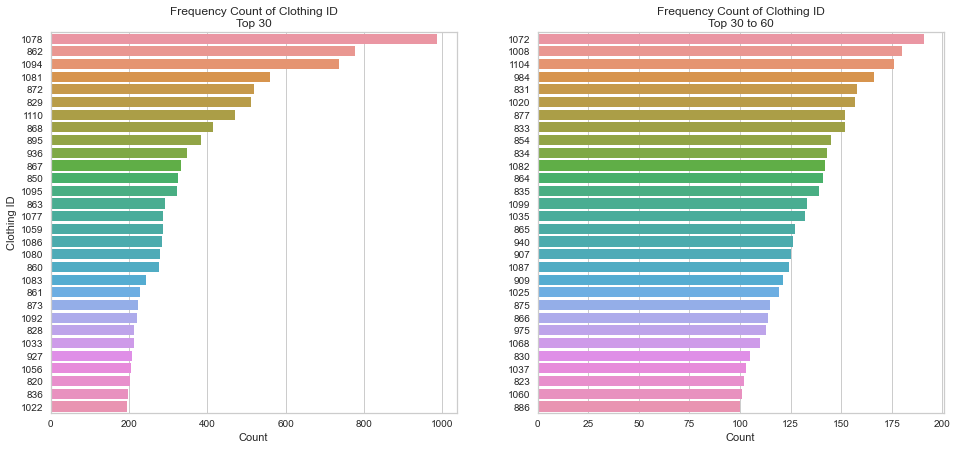

Dataframe Dimension: 22628 Rows


,mean,std,min,25%,50%,75%,max
Clothing ID,1015.4848,103.396022,862.0,862.0,1078.0,1094.0,1094.0
Age,42.7248,12.150429,18.0,34.0,41.0,51.0,99.0
Rating,4.1892,1.104306,1.0,4.0,5.0,5.0,5.0
Recommended IND,0.8184,0.385592,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,2.8624,6.773021,0.0,0.0,1.0,3.0,98.0
Label,0.9024,0.296832,0.0,1.0,1.0,1.0,1.0
Word Count,60.5912,28.731486,2.0,36.0,60.0,89.0,115.0


In [15]:
# Clothing ID Frequency Distributions
# Clothing ID Category
f, axes = plt.subplots(1, 2, figsize=[16, 7])
num = 30
sns.countplot(y='Clothing ID', data=df[df['Clothing ID'].isin(df['Clothing ID'].value_counts()[:num].index)],
              order= df['Clothing ID'].value_counts()[:num].index, ax=axes[0])
axes[0].set_title('Frequency Count of Clothing ID\nTop 30')
axes[0].set_xlabel('Count')

sns.countplot(y='Clothing ID', data=df[df['Clothing ID'].isin(df['Clothing ID'].value_counts()[num:60].index)],
              order=df['Clothing ID'].value_counts()[num:60].index, ax=axes[1])
axes[1].set_title('Frequency Count of Clothing ID\nTop 30 to 60')
axes[1].set_ylabel('')
axes[1].set_xlabel('Count')
plt.savefig('freqdist-clothingid-top60.png', format='png', dpi=600)
plt.show()

print('Dataframe Dimension: {} Rows'.format(df.shape[0]))
df[df['Clothing ID'].isin([1078, 862,1094])].describe().T.drop('count',axis=1)

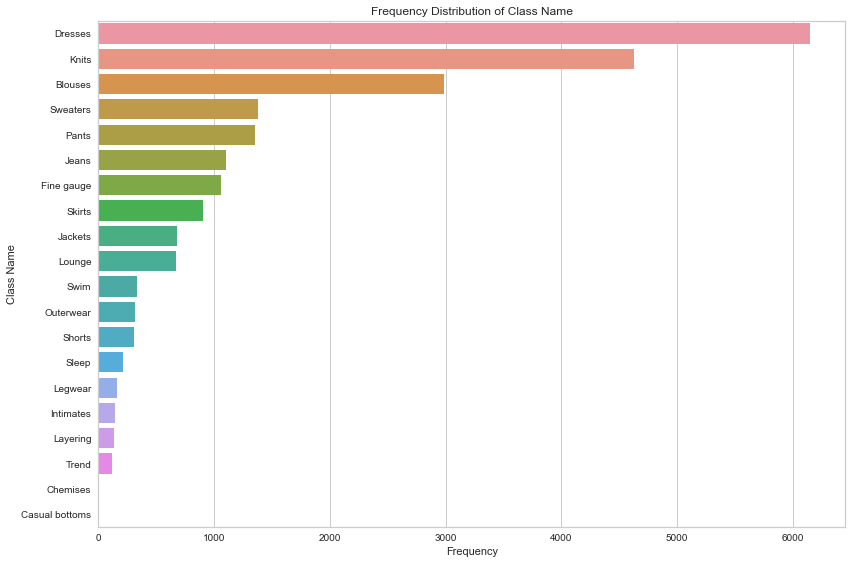

In [16]:
# Plotting the data based on Class Name distribution
plt.subplots(figsize=(12, 8))
sns.countplot(y='Class Name', data=df,order=df['Class Name'].value_counts().index)
plt.title('Frequency Distribution of Class Name')
plt.xlabel('Frequency')
plt.tight_layout()
plt.savefig('freqdist-classname.png', format='png', dpi=300)
plt.show()

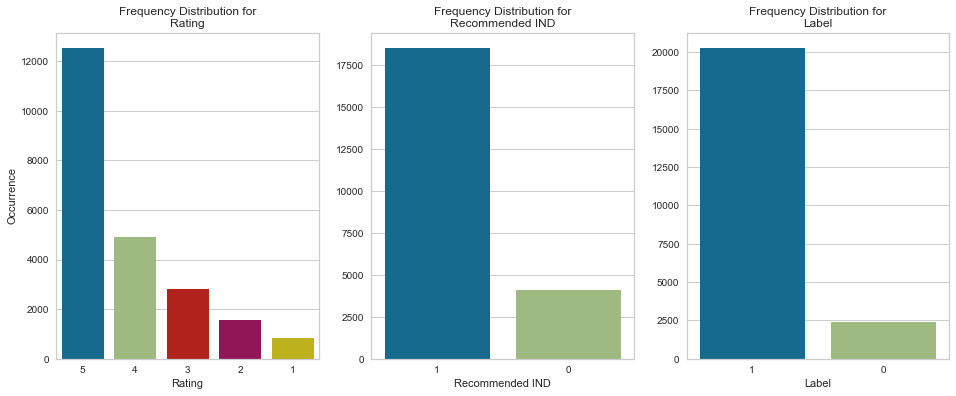

In [17]:
# Plotting for Rating, Recommended Ind and Label
cat_dtypes = ['Rating', 'Recommended IND', 'Label']
increment = 0
f, axes = plt.subplots(1, len(cat_dtypes), figsize=(16, 6), sharex=False)

for i in range(len(cat_dtypes)):
    sns.countplot(x=cat_dtypes[increment], data=df, order=df[cat_dtypes[increment]].value_counts().index, ax=axes[i])
    axes[i].set_title('Frequency Distribution for\n{}'.format(cat_dtypes[increment]))
    axes[i].set_ylabel('Occurrence')
    axes[i].set_xlabel('{}'.format(cat_dtypes[increment]))
    increment += 1
axes[1].set_ylabel('')
axes[2].set_ylabel('')
plt.savefig('freqdist-rating-recommended-label.png', format='png', dpi=300)
plt.show()

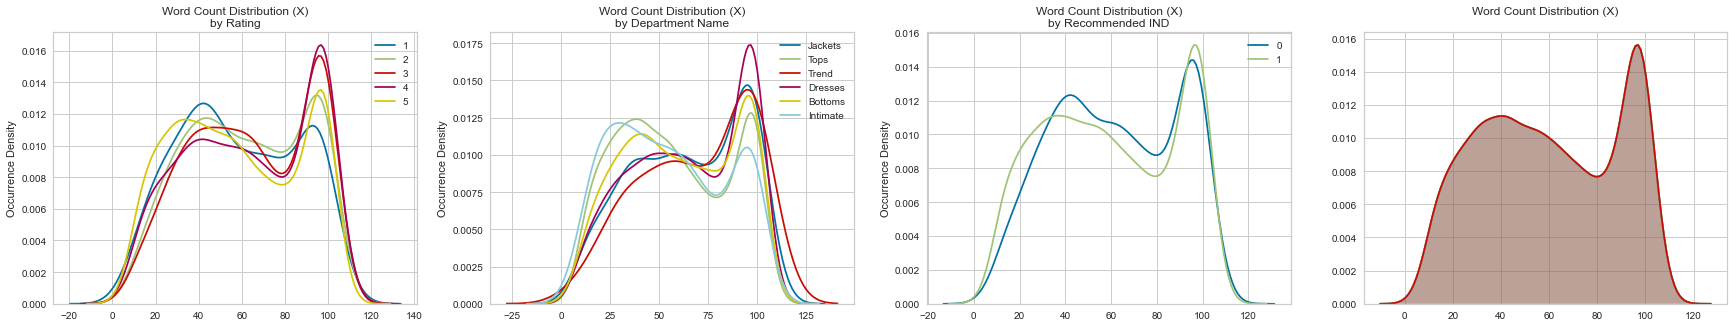

count    22628.000000
mean        60.211950
std         28.533053
min          2.000000
25%         36.000000
50%         59.000000
75%         88.000000
max        115.000000
Name: Word Count, dtype: float64

In [18]:
# Word Count by Rating, Department Name, and Recommended IND
# Density Plots
f, axes = plt.subplots(1, 4, figsize=(30, 5), sharex=False)

for index, y in enumerate(['Rating', 'Department Name', 'Recommended IND']):
    for x in set(df[y][df[y].notnull()]):
        sns.kdeplot(df['Word Count'][df[y]==x], label=x, shade=False, ax=axes[index])
        axes[index].set_title('{} Distribution (X)\nby {}'.format('Word Count', y))
    axes[index].set_ylabel('Occurrence Density')
    axes[index].set_xlabel('')
    
    # Plot 4
    axes[3].set_title('Word Count Distribution (X)\n')
    sns.kdeplot(df['Word Count'],shade=True,ax=axes[3])
    axes[index].set_xlabel("")
    axes[3].legend_.remove()
plt.savefig('wordcountdist-rating-deptname-recommended.png', format='png', dpi=300)
plt.show()

print("\nTotal Word Count is: {}".format(df["Word Count"].sum()))
df['Word Count'].describe().T


Total Word Count is: 1362476


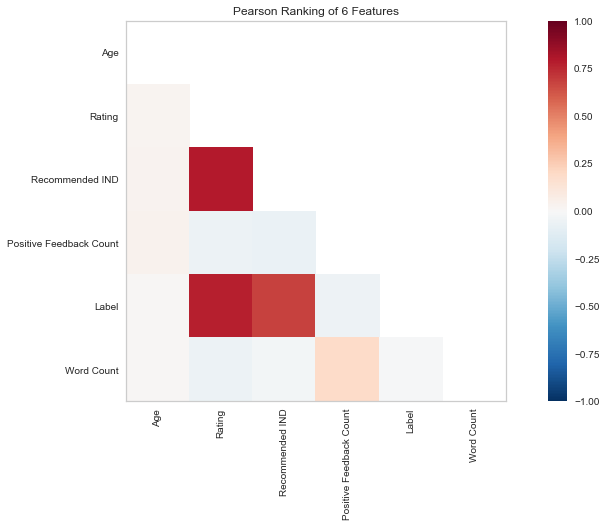

In [19]:
# To see if the data is correlated, make some Pearson Ranking charts
# The correlation between the variables is low (1 or -1 is high positive or high negative, 0 is low or no correlation)
# These results show there is correlation different different attributes
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# Getting columns names just for reference
#Age	Title	Review Text	Rating	Recommended IND	Positive Feedback Count	Division Name	Department Name	Class Name	Label

# 'Recommended IND' is the outcome we are looking for
# Specify the features of interest
num_features = ['Age', 'Rating', 'Recommended IND', 'Positive Feedback Count', 'Label', 'Word Count']

# extract the numpy arrays from the data frame
X = df[num_features].values#as_matrix()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="pcoords1.png") # Draw/show/poof the data
#plt.show()

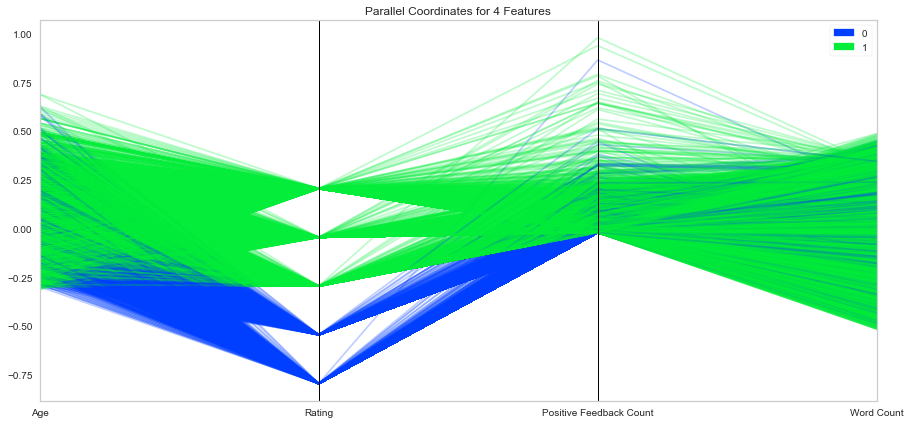

In [20]:
# Use Parallel Coordinates visualization to compare the distributions of numerical variables between 
# Reviews with positive feedback..where label =0 and 1
# Using the visualization from the earlier exercise
# Older people gave more positive feedbacks and better ratings  
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = [0, 1] # 'Recommended IND'
num_features = ['Age', 'Rating', 'Positive Feedback Count', 'Word Count']

# copy data to a new dataframe
data_norm = df.copy()
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (df[feature] - df[feature].mean(skipna=True)) / (df[feature].max(skipna=True) - df[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].values#as_matrix()
y = df.Label.values#as_matrix()

# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof(outpath="pcoords2.png") # Draw/show/poof the data
plt.show();

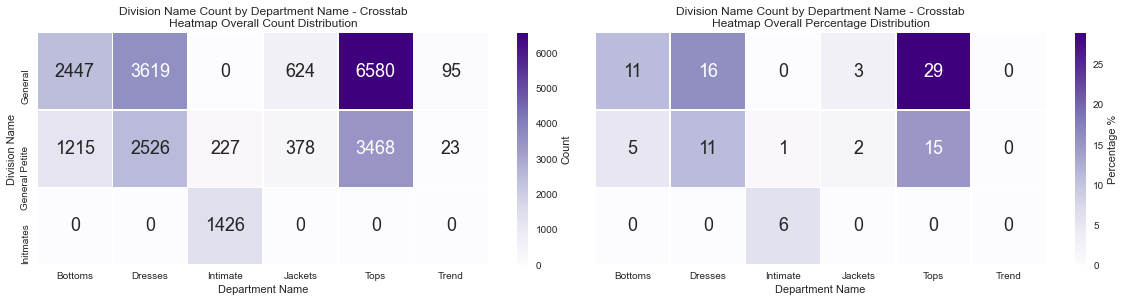

In [21]:
# Trying out heatmaps
# Displaying the same data as earlier but segregating based on other columns
# The two heatmaps are for 
# 1. Division Name Count by Department Name - by Count
# 2. Division Name Count by Department Name - by Percentage - normalized over entire population

# This is only for counts
f, ax = plt.subplots(1, 2, figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(df['Division Name'], df['Department Name']),
            annot=True, linewidths=.5, ax=ax[0], fmt='g', cmap='Purples',
            cbar_kws={'label': 'Count'}, annot_kws={"size": 18})
ax[0].set_title('Division Name Count by Department Name - Crosstab\nHeatmap Overall Count Distribution')
# normalizing the crosstab over entire population - %age
sns.heatmap(pd.crosstab(df['Division Name'], df['Department Name'], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap='Purples',
            cbar_kws={'label': 'Percentage %'}, annot_kws={"size": 18})
ax[1].set_title('Division Name Count by Department Name - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.savefig('divname-deptname.png', format='png', dpi=300)
plt.show()

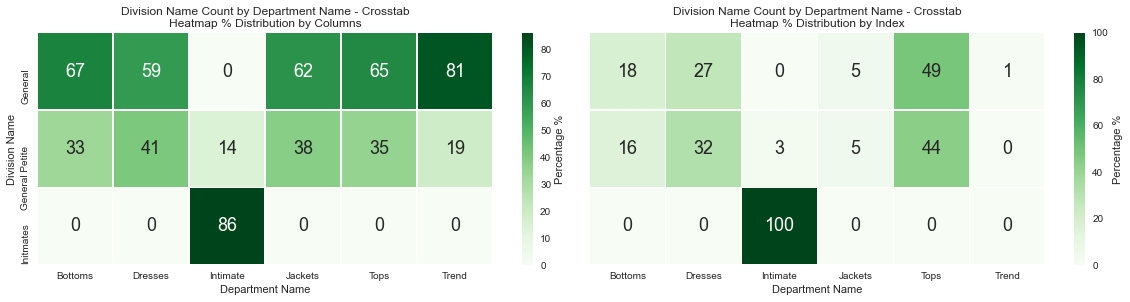

In [22]:
f, ax = plt.subplots(1, 2, figsize=(16, 4), sharey=True)
# normalizing over columns - %age
sns.heatmap(pd.crosstab(df['Division Name'], df['Department Name'], normalize='columns').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[0], fmt='g', cmap='Greens',
            cbar_kws={'label': 'Percentage %'}, annot_kws={"size": 18})
ax[0].set_title('Division Name Count by Department Name - Crosstab\nHeatmap % Distribution by Columns')

# normalizing over index - %age
sns.heatmap(pd.crosstab(df['Division Name'], df['Department Name'], normalize='index').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap='Greens',
            cbar_kws={'label': 'Percentage %'}, annot_kws={"size": 18})
ax[1].set_title('Division Name Count by Department Name - Crosstab\nHeatmap % Distribution by Index')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.savefig('divname-deptname-pivot.png', format='png', dpi=300)
plt.show()

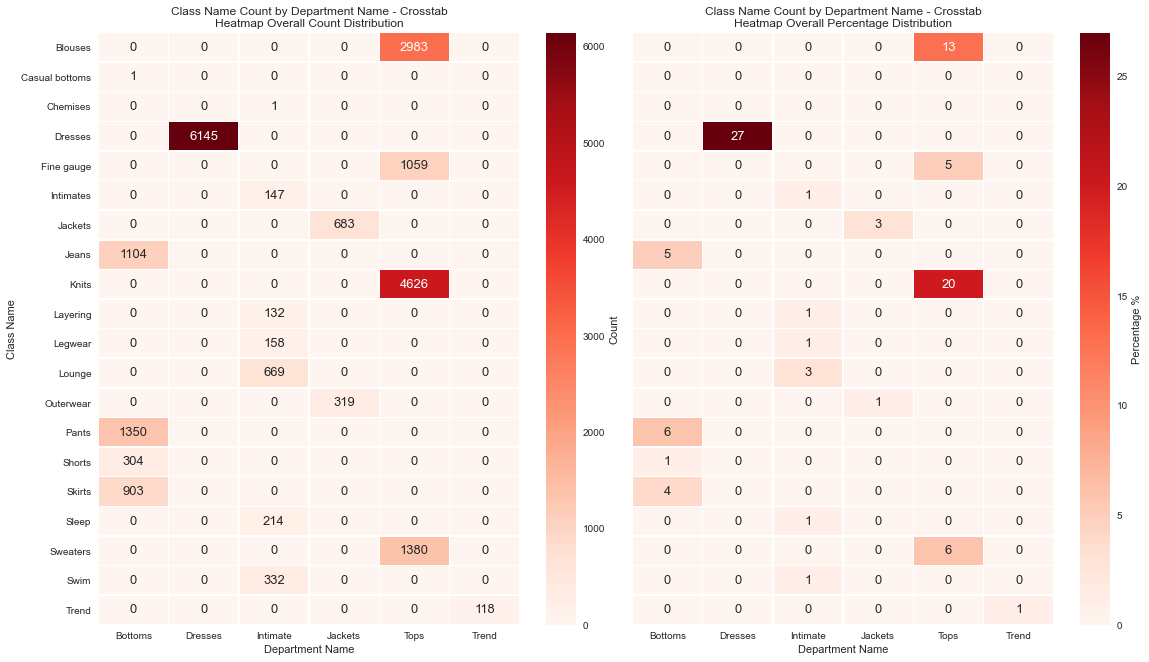

In [23]:
# The two heatmaps are for 
# 1. Class Name Count by Department Name - by Count
# 2. Class Name Count by Department Name - by Percentage - normalized over entire population
f, ax = plt.subplots(1, 2, figsize=(16, 9), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df['Department Name']),
            annot=True, linewidths=.5, ax=ax[0], fmt='g', cmap='Reds',
            cbar_kws={'label': 'Count'}, annot_kws={"size": fsize})
ax[0].set_title('Class Name Count by Department Name - Crosstab\nHeatmap Overall Count Distribution')

# normalizing the crosstab over entire population - %age
sns.heatmap(pd.crosstab(df['Class Name'], df['Department Name'], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap='Reds',
            cbar_kws={'label': 'Percentage %'}, annot_kws={"size": fsize})
ax[1].set_title('Class Name Count by Department Name - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.savefig('classname-deptname.png', format='png', dpi=300)
plt.show()

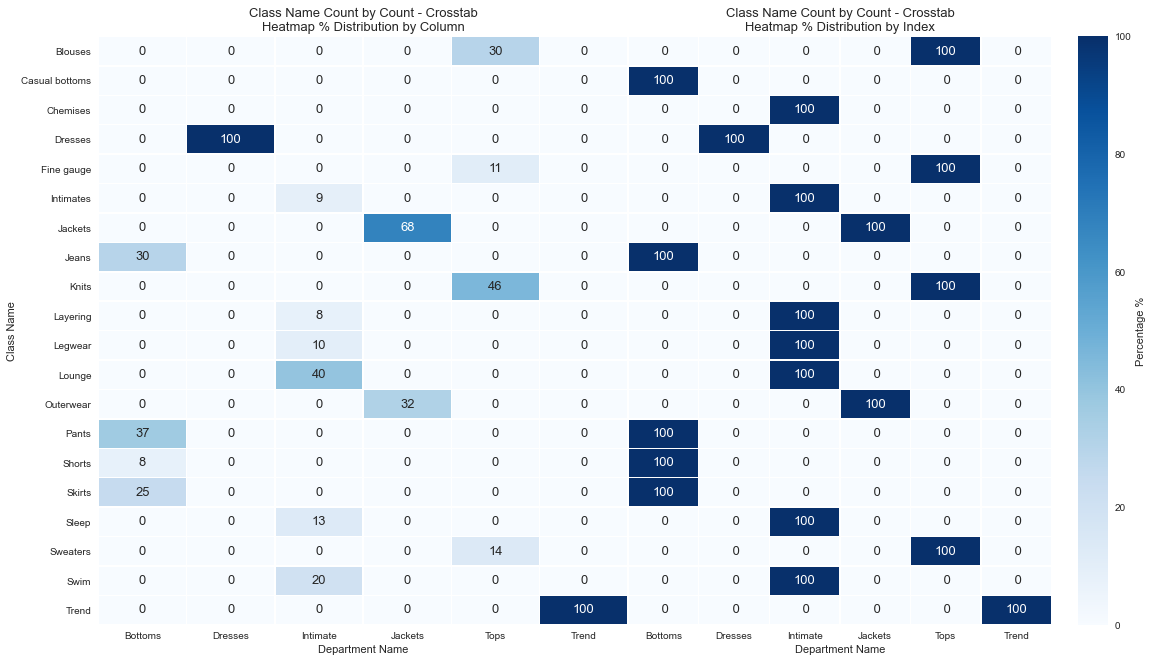

In [24]:
f, ax = plt.subplots(1, 2, figsize=(16, 9), sharey=True)
fsize = 13
# normalizing over columns - %age
sns.heatmap(pd.crosstab(df['Class Name'], df['Department Name'], normalize = 'columns').mul(100).round(0),
            annot=True, fmt='g', linewidths=.5, ax=ax[0],cbar=False, cmap='Blues', annot_kws={"size": fsize})

# normalizing over index - %age
ax[0].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Column', fontsize=fsize)
ax[1] = sns.heatmap(pd.crosstab(df['Class Name'], df['Department Name'], normalize = 'index').mul(100).round(0),
                    annot=True, fmt='2g', linewidths=.5, ax=ax[1],cmap='Blues',
                    cbar_kws={'label': 'Percentage %'}, annot_kws={"size": fsize})
ax[1].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Index', fontsize=fsize)
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.savefig('classname-deptname-pivot.png', format='png', dpi=300)
plt.show()

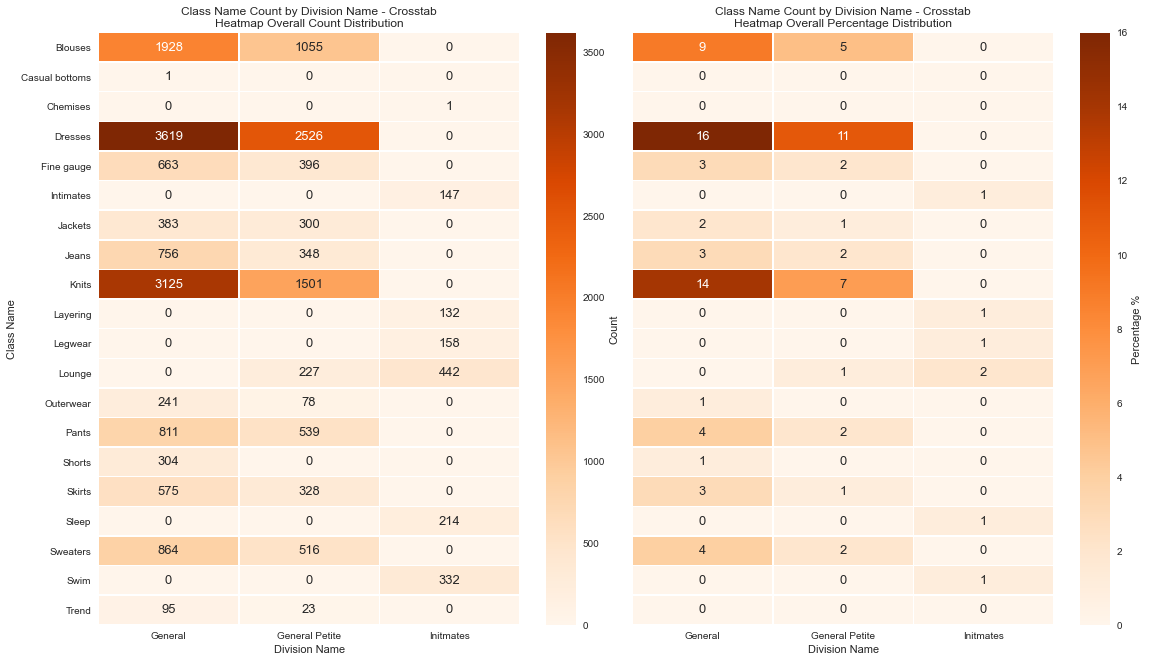

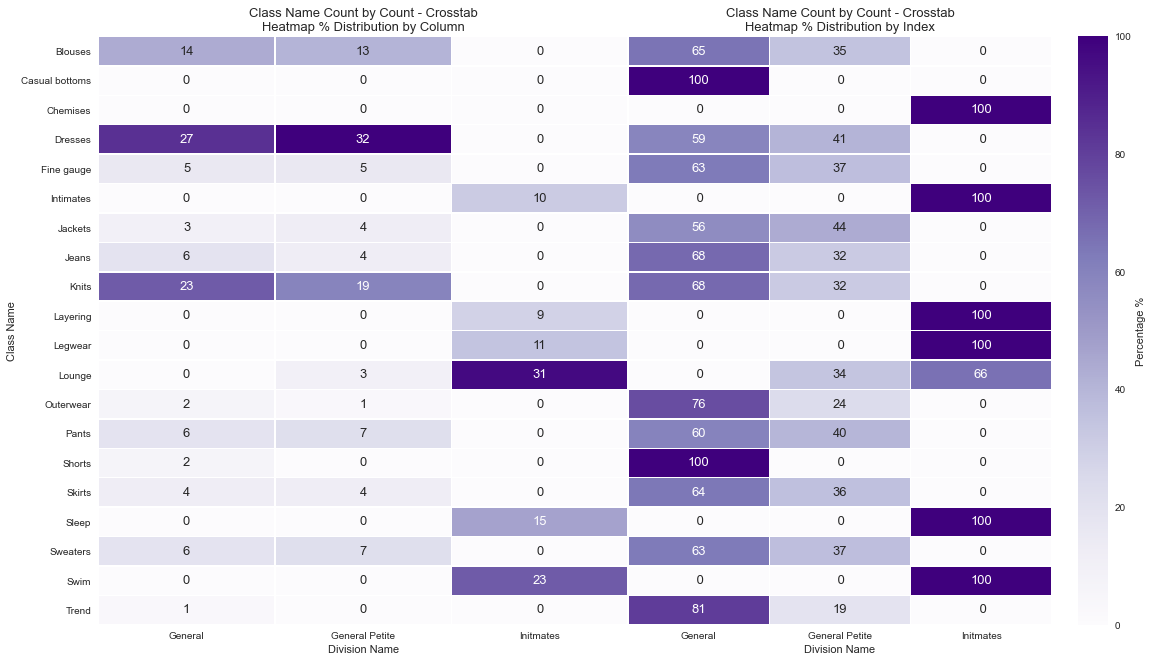

In [25]:
# The two heatmaps are for 
# 1. Class Name Count by Division Name - by Count
# 2. Class Name Count by Division Name - by Percentage - normalized over entire population
f, ax = plt.subplots(1, 2, figsize=(16, 9), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df['Division Name']),
            annot=True, linewidths=.5, ax=ax[0], fmt='g', cmap='Oranges',
            cbar_kws={'label': 'Count'}, annot_kws={"size": fsize})
ax[0].set_title('Class Name Count by Division Name - Crosstab\nHeatmap Overall Count Distribution')
# normalizing cross tab by overall population %age
sns.heatmap(pd.crosstab(df['Class Name'], df['Division Name'], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1], fmt='g', cmap='Oranges',
            cbar_kws={'label': 'Percentage %'}, annot_kws={"size": fsize})
ax[1].set_title('Class Name Count by Division Name - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.savefig('classname-divname.png', format='png', dpi=300)
plt.show()

# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1, 2, figsize=(16, 9), sharey=True)
fsize = 13
# normalizing cross tab by column %age
sns.heatmap(pd.crosstab(df['Class Name'], df['Division Name'], normalize = 'columns').mul(100).round(0),
            annot=True, fmt='g', linewidths=.5, ax=ax[0],cbar=False,cmap='Purples', annot_kws={"size": fsize})
ax[0].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Column', fontsize = fsize)
# normalizing cross tab by index row %age
ax[1] = sns.heatmap(pd.crosstab(df['Class Name'], df['Division Name'], normalize = 'index').mul(100).round(0),
                    annot=True, fmt='2g', linewidths=.5, ax=ax[1], cmap='Purples',
                    cbar_kws={'label': 'Percentage %'}, annot_kws={"size": fsize})
ax[1].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Index', fontsize=fsize)
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.savefig('classname-divname-pivot.png', format='png', dpi=300)

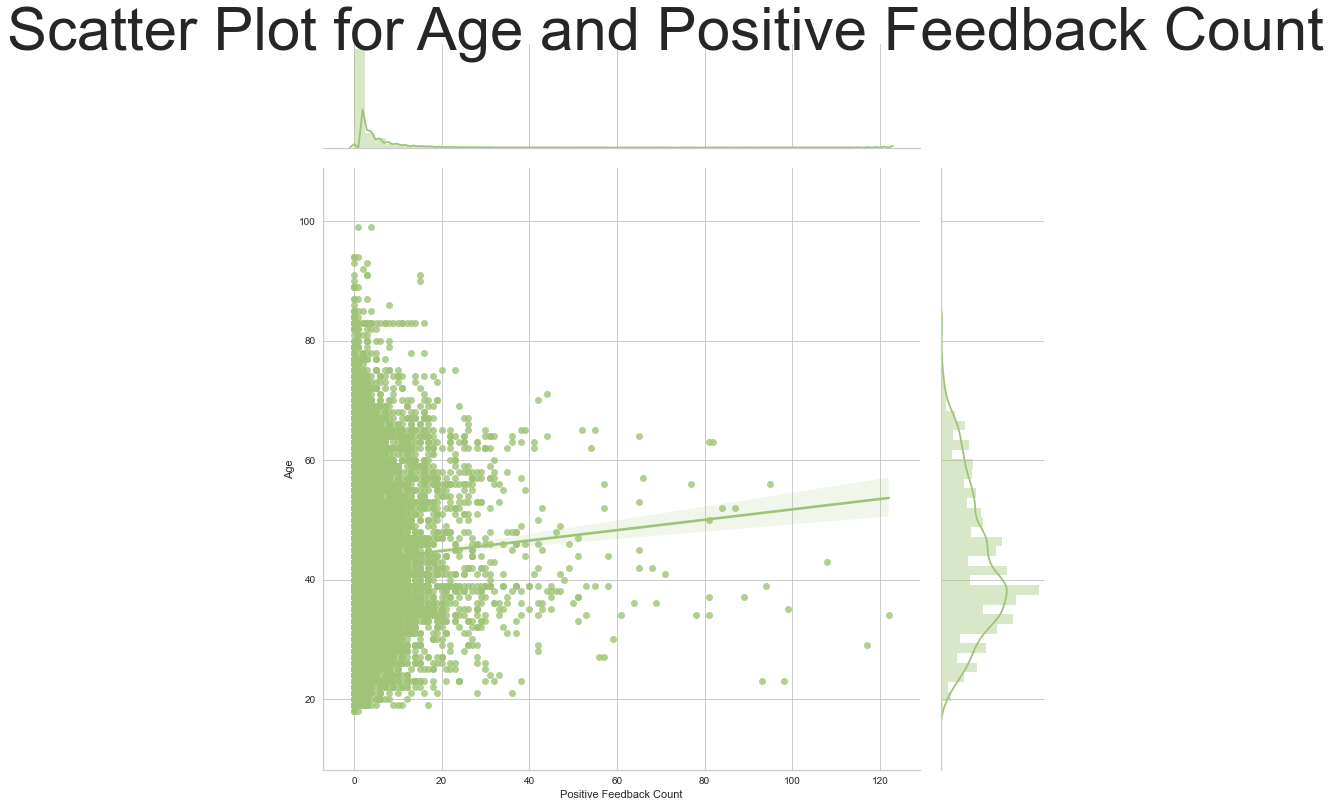

In [26]:
# for removing warnings
import warnings
warnings.filterwarnings('ignore')
# This is the scatter plot for Age and Positive Feedback Count
def minmaxscaler(df):
    return (df - df.min()) / (df.max() - df.min())

def zscorenomalize(df):
    return (df - df.mean()) / df.std()

g = sns.jointplot(x=df['Positive Feedback Count'], y=df['Age'], kind='reg', color='g', height=12)
g.fig.suptitle("Scatter Plot for Age and Positive Feedback Count")
plt.savefig('positivefeedback-age.png', format='png', dpi=300)
plt.show()

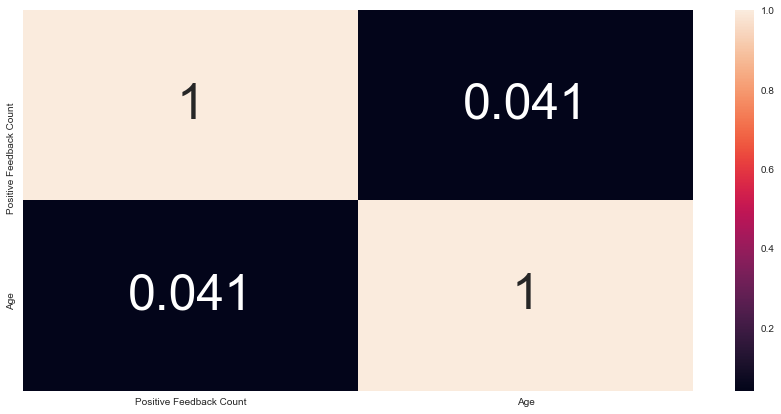

In [27]:
# Correlation using Heatmap for two attributes Age and Positive Feedback count
# Earlier did a similar heatmap for multiple attributes
sns.heatmap(df[['Positive Feedback Count', 'Age']].corr(), annot=True)

# Problem Statement -  Original Case Study - Part 2
Review and provide feedback to one of your classmate’s Case Study Part I assignments which are posted to the Case Study Part I discussion forum. Also review the feedback you receive on your Part I. Make any changes you think necessary.

Create Part II of your analysis case study project. In Part II, you should begin the dimensionality and feature reduction steps of your case study (feel free to modify these steps later if necessary). You can use any methods/tools you think are most appropriate. Again, keep in mind that this may look very different from what is done in the tutorial case study. You should do what makes sense for your project. Write the step-by-step instructions for completing the dimensionality/feature reduction. 

Submit parts I & II of your case study to the submissions link. Include your narrative, notebook (if applicable), data, and code.
Post parts I & II of your case study, excluding code, to the Case Study Part II disucssion forum.

In [28]:
# Adding this section as per feedback, I would also do some sentimental analysis. I would also 
# add a column for the sentimental score of the review.

In [29]:
# Working with Review Texts
pd.set_option('max_colwidth', 500)
df[["Title","Review Text", "Rating"]].sample(7)

,Title,Review Text,Rating
21112,Wonderful spring/summer addition!,"I first saw this shirt online and decided to see it in person. so happy i did! i never would have picked it up in the store. it looks much better on than on the hanger. it is so flattering! you can wear it on or off the shoulders and although it is a boxy shirt, it somehow makes you look slim! wow! i took my usual medium. highly recommend!",5
22167,Poor quality,"This top is beautiful in design, but sadly, i will be returning. it is hand wash, and even after doing so, i had 2 unraveled threads resulting in large holes. unfortunate since it was so flattering before washing.",1
6422,"Pink version is so pretty, xl fit great","I ordered the pink and it is the slightest hint of pink mixed with ivory. it fits true to size. the detailing of the crochet is outstanding. it reminds me of seashells that my daughter & i collected last year when we visited san diego. i wish the teal green one would be in stock in xl. i would grab it up. it's not the softest knit, but it's very comfortable to wear all day. very pretty version of a cardigan.",5
19800,NaN,"I love this sweater. i didn't buy it the first time when i tried it at the store because the buttoned look created a bulk on one side and i thought that this was very weird. it might have been what i was wearing underneath that day or that particular sweater. but then at 40% off i decided to give it another try and i'm happy that i did. i bought the navy and i love the feel of the material. sizing down makes all the difference, too. i wasn't fan of the attached sleeves at first as they are made",4
18093,Love pilcros!,"Love white jeans and these meet expectations. i'm 5'9"" and 145lbs and usually wear size 29 in pilcros but these run a little roomier than others i've bought. going to dry them to see if i can shrink them a bit, but still fine and super comfy. ties on the bottom are fun.",4
4187,Sweet and comfy,"I like this comfy top. i bought it to wear with a cute pair of gold charlie cropped pants i bought from retailer last fall. the only thing i don't like is the odd length of the sleeves. they are somewhere between elbow and 3/4. i am a true xxsp in most tops, but the sleeves end right at my elbow making it difficult to wear them unrolled. for reference i am 5'1"" and 107 lbs. a larger size would have been too wide and roomy. overall, i am happy with my purchase.",4
6679,Make your buns look adorable,"Love this brand and i keep coming back. i don't have the most tone tush, but maaji always gives a cute little lift. i order a size up (usually a small so i order a medium).",5


In [30]:
# Cleaning the Text
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

ps = PorterStemmer()

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    #words = [ps.stem(w) for w in words] #4
    return words

In [31]:
#Sentimental analysis using Vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Pre-Processing
SIA = SentimentIntensityAnalyzer()
df['Review Text']= df['Review Text'].astype(str)

# Applying Model, Variable Creation
df['Polarity Score'] = df['Review Text'].apply(lambda x: SIA.polarity_scores(x)['compound'])
df['Neutral Score'] = df['Review Text'].apply(lambda x: SIA.polarity_scores(x)['neu'])
df['Negative Score'] = df['Review Text'].apply(lambda x: SIA.polarity_scores(x)['neg'])
df['Positive Score'] = df['Review Text'].apply(lambda x: SIA.polarity_scores(x)['pos'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Sentiment'] = ''
df.loc[df['Polarity Score'] > 0, 'Sentiment'] = 'Positive'
df.loc[df['Polarity Score'] == 0, 'Sentiment'] = 'Neutral'
df.loc[df['Polarity Score'] < 0, 'Sentiment'] = 'Negative'

In [32]:
# function to calculate percentage for standardization
# will be used in subsequent steps of bar plots
def percentstandardize_barplot(x, y, hue, data, ax=None, order=None):
    """
    Standardize by percentage the data using pandas functions, then plot using Seaborn.
    Function arguments are and extension of Seaborns'.
    """
    sns.barplot(x=x, y=y, hue=hue, ax=ax, order=order,
    data=(data[[x, hue]]
          .reset_index(drop=True)
          .groupby([x])[hue]
          .value_counts(normalize=True)
          .rename('Percentage').mul(100)
          .reset_index()
          .sort_values(hue)))
    plt.title('Percentage Frequency of {} by {}'.format(hue, x))
    plt.ylabel('Percentage %')

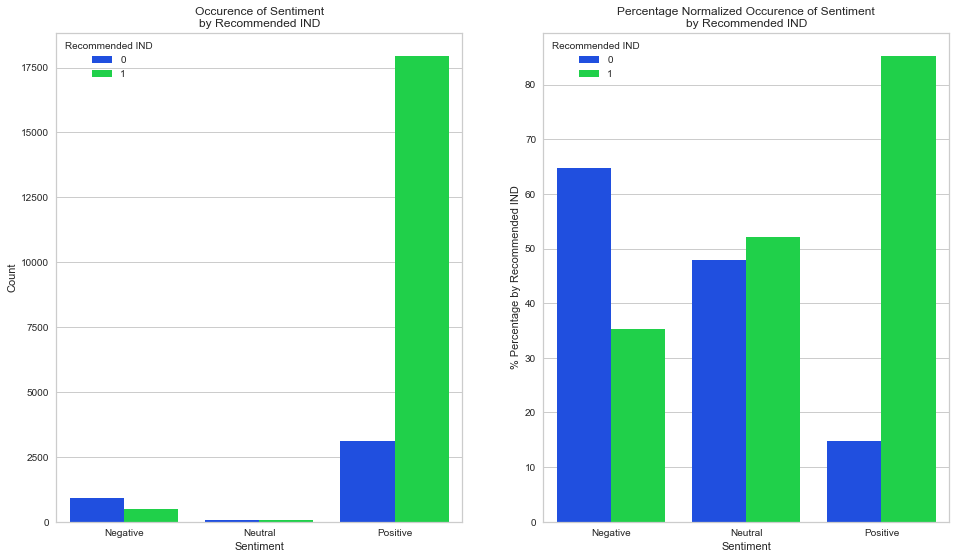

In [33]:
# Normalized plots for sentimental analysis
# shows how many times for what different sentimental scores have we got Recommended Ind as 0 and 1
# The first plot is Count of Occurence of each sentimental scores grouped by Recommended Ind
# The second plot is %age of Occurence of each sentimental scores grouped by Recommended Ind - in each of the categories
huevar = 'Recommended IND'
xvar = 'Sentiment'
f, axes = plt.subplots(1, 2, figsize=(16, 9))
plt.rcParams['legend.title_fontsize'] = 10
#plt.setp(plt.gca().get_legend().get_texts(), fontsize='10')
sns.countplot(x=xvar, hue=huevar,data=df, ax=axes[0], order=['Negative', 'Neutral', 'Positive'])
axes[0].set_title('Occurence of {}\nby {}'.format(xvar, huevar))
axes[0].set_ylabel('Count')

percentstandardize_barplot(x=xvar, y='Percentage', hue=huevar, data=df, ax=axes[1])
axes[1].set_title('Percentage Normalized Occurence of {}\nby {}'.format(xvar, huevar))
axes[1].set_ylabel('% Percentage by {}'.format(huevar))

#f.get_title().set_fontsize('10') #legend 'Title' fontsize
#plt.setp(plt.gca().get_legend().get_texts(), fontsize='10') #legend 'list' fontsize



plt.savefig('norm-sentimentdist.png', format='png', dpi=300)
plt.show()

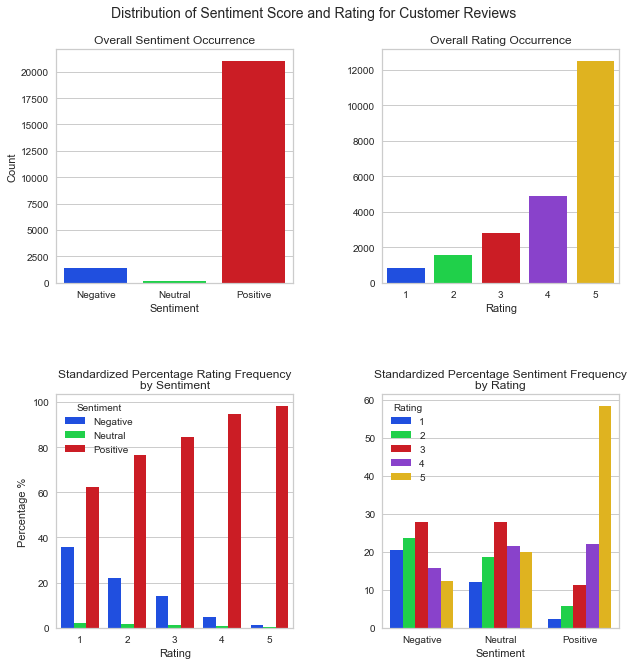

In [34]:
# Below are the plots for
# 1. Overall Sentiment Occurrence - counts of each sentiment
# 2. Overall Rating Occurrrence - counts of each rating
# 3. Other 2 plots show how sentiments are distributed Ratings wise 
# and then Ratings sentiment wise
f, axes = plt.subplots(2, 2, figsize=[10, 10])
sns.countplot(x='Sentiment', data=df, ax=axes[0, 0], order=['Negative', 'Neutral', 'Positive'])
axes[0,0].set_xlabel('Sentiment')
axes[0,0].set_ylabel('Count')
axes[0,0].set_title('Overall Sentiment Occurrence')

sns.countplot(x='Rating', data=df, ax=axes[0, 1])
axes[0,1].set_xlabel('Rating')
axes[0,1].set_ylabel('')
axes[0,1].set_title('Overall Rating Occurrence')

percentstandardize_barplot(x='Rating', y='Percentage', hue='Sentiment', data=df, ax=axes[1, 0])
axes[1,0].set_xlabel('Rating')
axes[1,0].set_ylabel('Percentage %')
axes[1,0].set_title('Standardized Percentage Rating Frequency\nby Sentiment')

percentstandardize_barplot(x='Sentiment', y='Percentage',hue='Rating', data=df, ax=axes[1, 1])
axes[1,1].set_ylabel('Occurrence Frequency')
axes[1,1].set_title('Standardized Percentage Sentiment Frequency\nby Rating')
axes[1,1].set_xlabel('Sentiment')
axes[1,1].set_ylabel('')

f.suptitle('Distribution of Sentiment Score and Rating for Customer Reviews', fontsize=14)
f.tight_layout()
f.subplots_adjust(top=0.92)
plt.savefig('sentimentscoredist-rating.png', format='png', dpi=300)
plt.show()

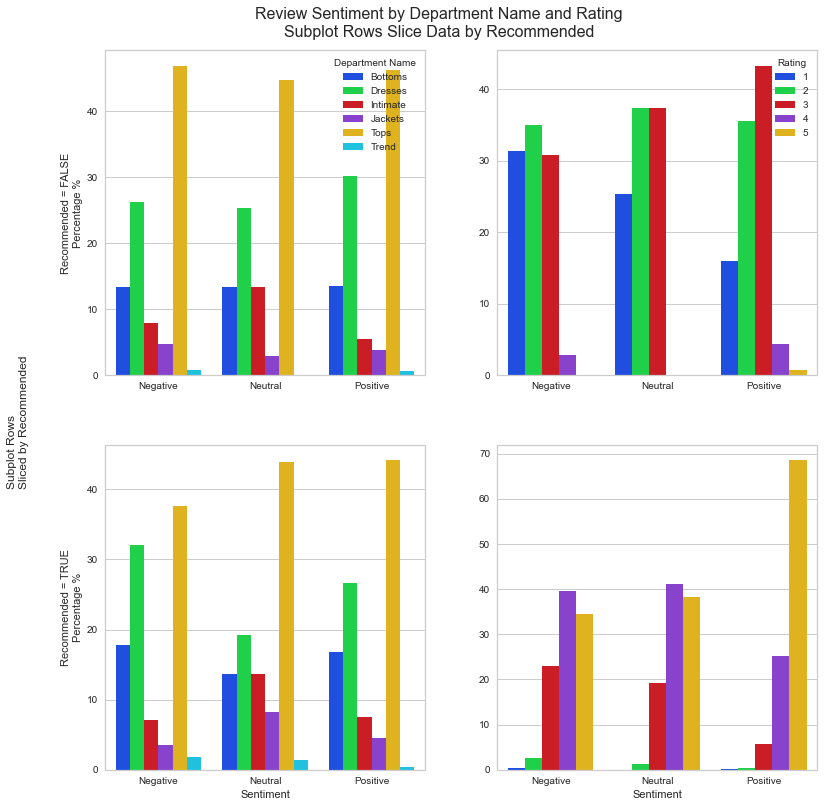

In [35]:
xvar = 'Sentiment'
huevar = 'Department Name'
rowvar = 'Recommended IND'

# Plot
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=False, sharey=False)
for i,x in enumerate(set(df[rowvar][df[rowvar].notnull()])):
    percentstandardize_barplot(x=xvar, y='Percentage', hue=huevar, data=df[df[rowvar] == x],
                               ax=axes[i,0], order=['Negative','Neutral','Positive'])
    percentstandardize_barplot(x=xvar, y='Percentage', hue='Rating', data=df[df[rowvar] == x],
                               ax=axes[i,1], order=['Negative','Neutral','Positive'])

# Plot Aesthetics
axes[1,0].legend_.remove()
axes[1,1].legend_.remove()
axes[0,1].set_ylabel('')
axes[1,1].set_ylabel('')
axes[0,0].set_xlabel('')
axes[0,1].set_xlabel('')
axes[0,0].set_ylabel('Recommended = FALSE\nPercentage %')
axes[1,0].set_ylabel('Recommended = TRUE\nPercentage %')
axes[1,1].set_title('')

# Common title and ylabel
f.text(0.0, 0.5, 'Subplot Rows\nSliced by Recommended', va='center', rotation='vertical', fontsize=12)
f.suptitle('Review Sentiment by Department Name and Rating\nSubplot Rows Slice Data by Recommended', fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.93)
plt.savefig('sentiment-deptname-rating-recommended.png', format='png', dpi=300)
plt.show()

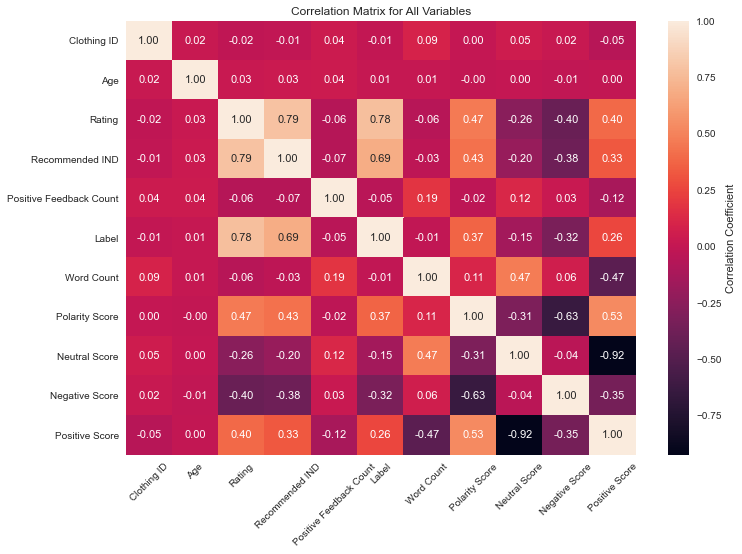

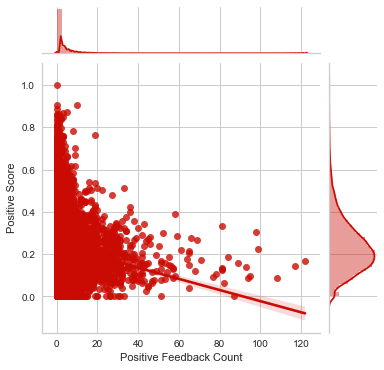

In [36]:
# This is the correlation plot for all the attributes that have been added to the dataframe
# Thus helping us understand how each attribute affects each other
f, ax = plt.subplots(figsize=[12, 9])
fsize =11
ax = sns.heatmap(df.corr(), annot=True,
                 fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'},
                 annot_kws={"size": fsize})
ax.set_title('Correlation Matrix for All Variables')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('corr-all.png', format='png', dpi=300)
plt.show()

# Sentiment Positivity Score by Positive Feedback Count
ax = sns.jointplot(x= df['Positive Feedback Count'], y=df['Positive Score'], kind='reg', color='r', 
                   annot_kws={"size": fsize})
plt.savefig('positivesentiment-positivefeedback.png', format='png', dpi=300)
plt.show()

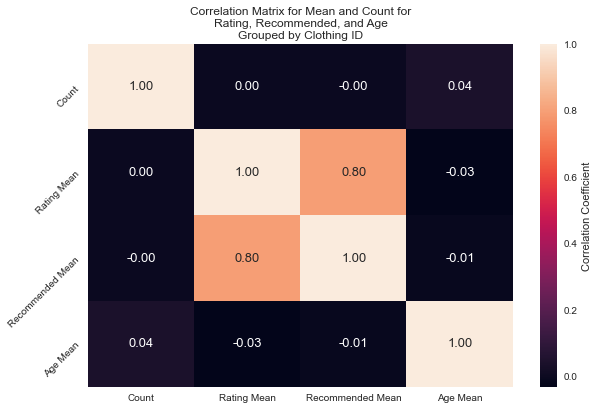

In [37]:
# Also adding a few more plots around correlation
# Average Rating and Recommended IND by Clothing ID Correlation
fsize=13
temp = (df.groupby('Clothing ID')[['Rating', 'Recommended IND', 'Age']]
        .aggregate(['count', 'mean']))
temp.columns = ['Count', 'Rating Mean', 'Recommended IND Count',
                'Recommended Mean', 'Age Count', 'Age Mean']
temp.drop(['Recommended IND Count', 'Age Count'], axis=1, inplace=True)

# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[10, 7])
ax = sns.heatmap(temp.corr(),
                 annot=True, fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'}, annot_kws={"size": fsize})
ax.set_title('Correlation Matrix for Mean and Count for\nRating, Recommended, and Age\nGrouped by Clothing ID')
plt.yticks(rotation=45)
plt.tight_layout()
plt.savefig('meanrating-recommended-clothing-corr.png', format='png', dpi=300)
plt.show()

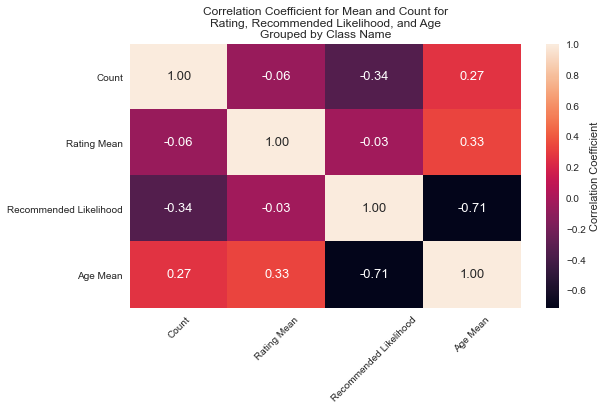

Class Categories:
 ['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' 'Casual bottoms' 'Chemises']


In [38]:
# Average Rating and Recommended IND by Class Name Correlation
key = 'Class Name'
temp = (df.groupby(key)[['Rating', 'Recommended IND', 'Age']]
        .aggregate(['count', 'mean']))
temp.columns = ['Count', 'Rating Mean', 'Recommended Likelihood Count',
                'Recommended Likelihood', 'Age Count', 'Age Mean']
temp.drop(['Recommended Likelihood Count', 'Age Count'], axis=1, inplace=True)

# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[10, 7])
ax = sns.heatmap(temp.corr(),
                 annot=True, fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'}, annot_kws={"size": fsize})
ax.set_title('Correlation Coefficient for Mean and Count for\nRating, Recommended Likelihood, and Age\nGrouped by {}'.format(key))
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('meanrating-recommended-classname-corr.png', format='png', dpi=300)
plt.show()
print('Class Categories:\n',df['Class Name'].unique())

In [39]:
# Rechecking df.head - as we added few columns
print(df.head(10))

   Clothing ID  Age                                 Title  \
0          767   33                                   NaN   
1         1080   34                                   NaN   
2         1077   60               Some major design flaws   
3         1049   50                      My favorite buy!   
4          847   47                      Flattering shirt   
5         1080   49               Not for the very petite   
6          858   39                  Cagrcoal shimmer fun   
7          858   39  Shimmer, surprisingly goes with lots   
8         1077   24                            Flattering   
9         1077   34                     Such a fun dress!   

                                                                                                                                                                                                                                                                                                                                        

In [40]:
# Based on additional sentimental review text analysis scores, we would also use them as features
# Below is the additional list of features, we would use
#Polarity Score
#Neutral Score
#Neagtive Score
#Positive Score
#Sentiment

# Negative Score - 0, Zero Score - 1, Positive Score - 2
def sentiment_to_numeric(x):
        if x=='Positive': return 2
        if x=='Negative': return 0
        return 1

# Change Scores to percentage - so will mutliply by 100

# Changing Sentiment Column to int
df['SentimentScore'] = df['Sentiment'].apply(sentiment_to_numeric)
df.head(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Label,Word Count,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment,SentimentScore
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates,1,8,0.8932,0.272,0.000,0.728,Positive,2
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,1,62,0.9729,0.664,0.000,0.336,Positive,2
2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - ...",3,0,0,General,Dresses,Dresses,1,98,0.9427,0.792,0.027,0.181,Positive,2
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,1,22,0.5727,0.340,0.226,0.434,Positive,2
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,1,36,0.9291,0.700,0.000,0.300,Positive,2
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.",2,0,4,General,Dresses,Dresses,0,98,0.9419,0.853,0.000,0.147,Positive,2
6,858,39,Cagrcoal shimmer fun,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.",5,1,1,General Petite,Tops,Knits,1,101,0.8004,0.881,0.023,0.096,Positive,2
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants). everything went with it. the color is really nice charcoal with shimmer, and went well with pencil skirts, flare pants, etc. my only compaint is it is a bit big, sleeves are long and it doesn't go in petite. also a bit loose for me, but no xxs... so i kept it and wil ldecide later since the light color is already sold out in hte smallest size...",4,1,4,General Petite,Tops,Knits,1,97,-0.0909,0.901,0.046,0.053,Negative,0
8,1077,24,Flattering,I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.,5,1,0,General,Dresses,Dresses,1,34,0.7175,0.818,0.000,0.182,Positive,2
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i orde

In [41]:
# This is the list of features we will analyse.
features_model = ['Age', 'Rating', 'Positive Feedback Count', 'Word Count','SentimentScore']

In [42]:
# For feature reduction, we may use different methods of feature selection
# 1. Since our target is categorical, we may try removing Irrelevant features by Chi Squared test or Anova F Value.
# In the examples below, I am using - SelectKBest, chi2, f_classif & SelectPercentile libraries to identify fest features
# Later I will build models on all three scenarios and base one to compare the models

# Load libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif
# We will select only below features and drop others for our model
#features_model = ['Age', 'Rating', 'Positive Feedback Count', 'Word Count']
features = pd.concat([df[features_model]], axis=1)

# this is our target
target = df['Recommended IND']

# Changing Sentiment - categorical variable to integer - 
# Though this neutralizes our scores in range 0 - 1, however we will look from sentiment score
features = features.astype(int) 

# Select 3 best features with highest Chisquared statistics
chi2_selector = SelectKBest(chi2,k=3)
features_kbest = chi2_selector.fit_transform(features,target)

# Show Results
print("Original Number of Features:", features.shape[1])
print("Reduced Number of Features:", features_kbest.shape[1])

display(features_kbest)
display(features)
# 3 top feature are - Rating, Positive Feedback Count, SentimentScore
# Age is not a factor, thats good. It means the data is unbiased

Original Number of Features: 5
Reduced Number of Features: 3


array([[ 4,  0,  2],
       [ 5,  4,  2],
       [ 3,  0,  2],
       ...,
       [ 3,  1,  2],
       [ 3,  2,  2],
       [ 5, 22,  2]])

,Age,Rating,Positive Feedback Count,Word Count,SentimentScore
0,33,4,0,8,2
1,34,5,4,62,2
2,60,3,0,98,2
3,50,5,0,22,2
4,47,5,6,36,2
...,...,...,...,...,...
23481,34,5,0,28,2
23482,48,3,0,38,2
23483,31,3,1,42,2
23484,28,3,2,86,2


In [43]:
# Select 3 featues with highest F-values
fvalue_selector = SelectKBest(f_classif, k=3)
features_kbest = fvalue_selector.fit_transform(features,target)

# Show Results
print("Original Number of Features:", features.shape[1])
print("Reduced Number of Features:", features_kbest.shape[1])

display(features_kbest)
display(features)
# Top Features are - Rating, Positive Feedback Count, Sentiment Score

Original Number of Features: 5
Reduced Number of Features: 3


array([[ 4,  0,  2],
       [ 5,  4,  2],
       [ 3,  0,  2],
       ...,
       [ 3,  1,  2],
       [ 3,  2,  2],
       [ 5, 22,  2]])

,Age,Rating,Positive Feedback Count,Word Count,SentimentScore
0,33,4,0,8,2
1,34,5,4,62,2
2,60,3,0,98,2
3,50,5,0,22,2
4,47,5,6,36,2
...,...,...,...,...,...
23481,34,5,0,28,2
23482,48,3,0,38,2
23483,31,3,1,42,2
23484,28,3,2,86,2


In [44]:
# Selecting features based on SelectPercentile

# Load Library
from sklearn.feature_selection import SelectPercentile

# Select top 75% of features with highest F-values
fvalue_selector = SelectPercentile(f_classif,percentile=75)
features_kbest = fvalue_selector.fit_transform(features,target)

# Show Results
print("Original Number of Features:", features.shape[1])
print("Reduced Number of Features:", features_kbest.shape[1])

display(features_kbest) # Rating, Positive Feedback Count and Sentiment Score
display(features)

# Top Features - Rating, Positive Feedback Count and Sentiment Score

Original Number of Features: 5
Reduced Number of Features: 3


array([[ 4,  0,  2],
       [ 5,  4,  2],
       [ 3,  0,  2],
       ...,
       [ 3,  1,  2],
       [ 3,  2,  2],
       [ 5, 22,  2]])

,Age,Rating,Positive Feedback Count,Word Count,SentimentScore
0,33,4,0,8,2
1,34,5,4,62,2
2,60,3,0,98,2
3,50,5,0,22,2
4,47,5,6,36,2
...,...,...,...,...,...
23481,34,5,0,28,2
23482,48,3,0,38,2
23483,31,3,1,42,2
23484,28,3,2,86,2


In [45]:
# Based on Best features from the list of the 5 we started initially,
# I will try to build models for top 3 - Rating, Positive Feedback Count and Sentiment Score 
# if time permits will also have model for All 5 features
# Then will compare them against each other.

# Problem Statement - Original Case Study - Part 3
Review and provide feedback to one of your classmate’s Case Study Part II assignments which are posted to the Case Study Part II discussion forum. Also review the feedback you receive on your part II assignment. Make any changes you think necessary.

Create Part III of your analysis case study project. In Part III, begin the process of model evaluation and selection (feel free to modify this later if necessary). You can use any methods/tools you think are most appropriate. Like in Parts I & II, this may look very different from the tutorial case study. In addition, write step-by-step instructions for performing the model evaluation and selection part of your case study.

Submit Parts I, II, and III of your case study to the to the submission link. Include your narrative, data, notebook (if applicable), and code.
Post your entire case study, excluding code, to the Case Study Part III discussion forum.
This is due by the end of Week 8. This is a cumulative project so it is imperative that you do not fall behind.

In [46]:
# Feedback Corrections
# Made changes to Part 1 and Part 2, based on the feedbacks
# Changes include 
# 1. Added more detailed narrative in Part 1 as Introduction, which tells what I will be doing
# 2. Added more analysis around sentimental analysis around the review text. Generated scores using Vader library

In [47]:
# In this section, I would be evaluating two models - Logistic Regression and Random Forest.
# Based on the Evalaluation metrics will select the better model of the two

In [48]:
# Load Libraries
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [49]:
# Trying out a model with top 3 features we picked earlier.
# Training - Split your data into two sets:  Training and Testing.  
# create a whole features dataset that can be used for train and validation data splitting

# We will select only below features and drop others for our model
# this is the overall features we started with - just keeping for reference
features_model_full = ['Age', 'Rating', 'Positive Feedback Count', 'Word Count','SentimentScore']
# Top 3 features
features_model = ['Rating', 'Positive Feedback Count','SentimentScore']
#features_model = ['Age', 'Rating', 'Positive Feedback Count', 'Word Count']
data_model_X = pd.concat([df[features_model]], axis=1)


# create a whole target dataset that can be used for train and validation data splitting
data_model_y = df['Recommended IND']
# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Recommended values - 0 and 1
print('\n')
print('No. of Recommended Ind in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of Recommended Ind in the validation set:')
print(y_val.value_counts())



No. of samples in training set:  15839
No. of samples in validation set: 6789


No. of Recommended Ind in the training set:
1    12954
0     2885
Name: Recommended IND, dtype: int64


No. of Recommended Ind in the validation set:
1    5573
0    1216
Name: Recommended IND, dtype: int64


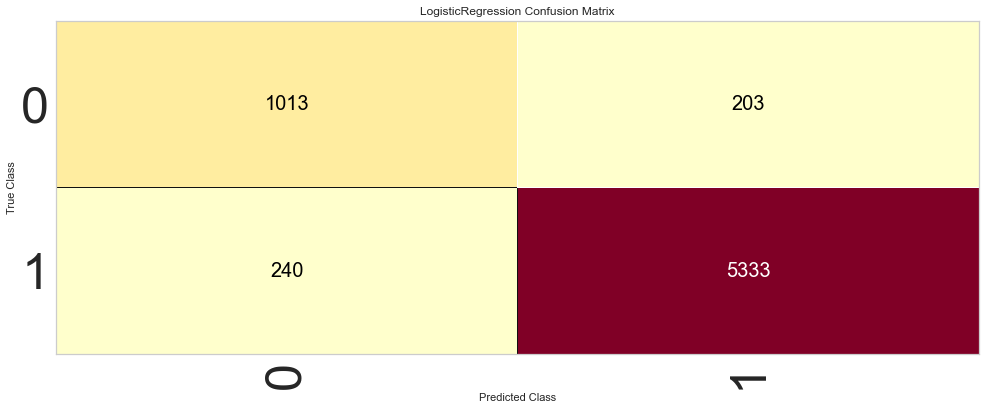

In [50]:
# Using Model as Logistic Regression
# 15.	 Evaluation – Remember, we are trying to predict if a Recommended Ind is 0 or 1.  
# a.	Metrics for the evaluation:  
# i.	Confusion Matrix  (1013 + 5333 / 5573 + 1216) = 6346/6789 = 93.5% approx which is good
# ii.	Precision, Recall & F1 score (all 3 were very good)
# iii.	ROC curve (the dotted line is the randomly guessed so anything above that is good metric)

# Step 15 - Eval Metrics
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model_logit = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = [0,1]
cm_logit = ConfusionMatrix(model_logit, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm_logit.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm_logit.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm_logit.ax.texts:
    label.set_size(20)

#How did we do?
cm_logit.show()

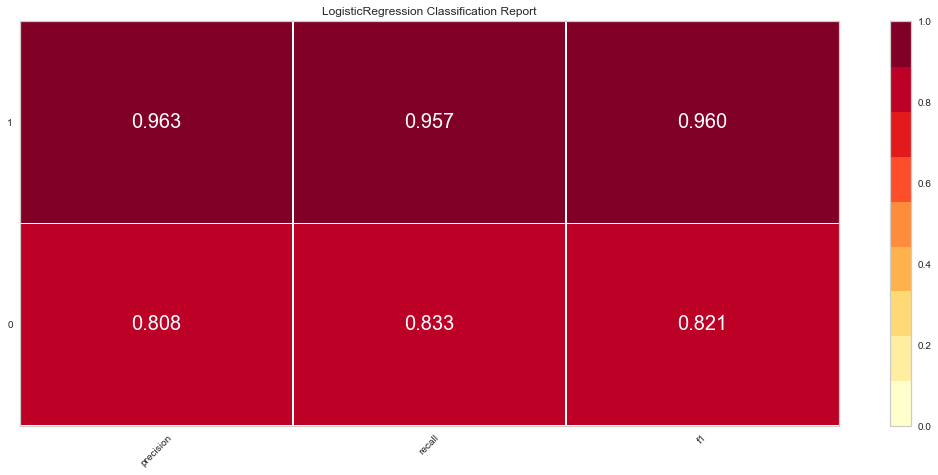

In [51]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model_logit, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.show()

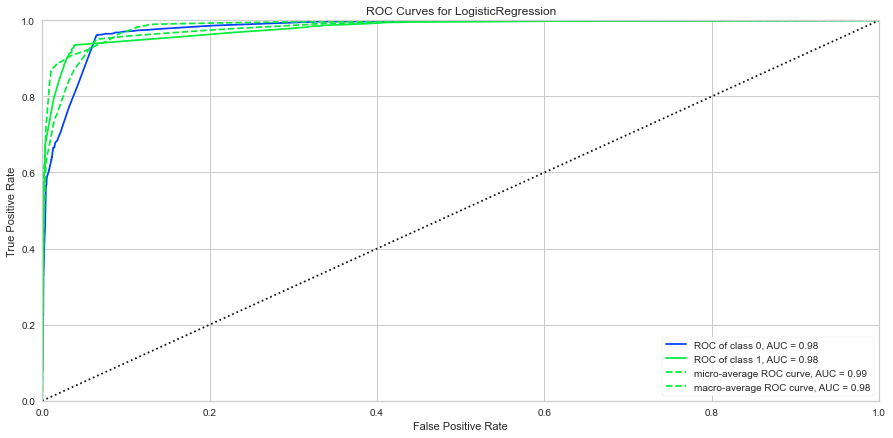

In [52]:
# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model_logit)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.show()


In [53]:
# will compare with Random Forest
# trying to compare the same
# Load Libraries
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

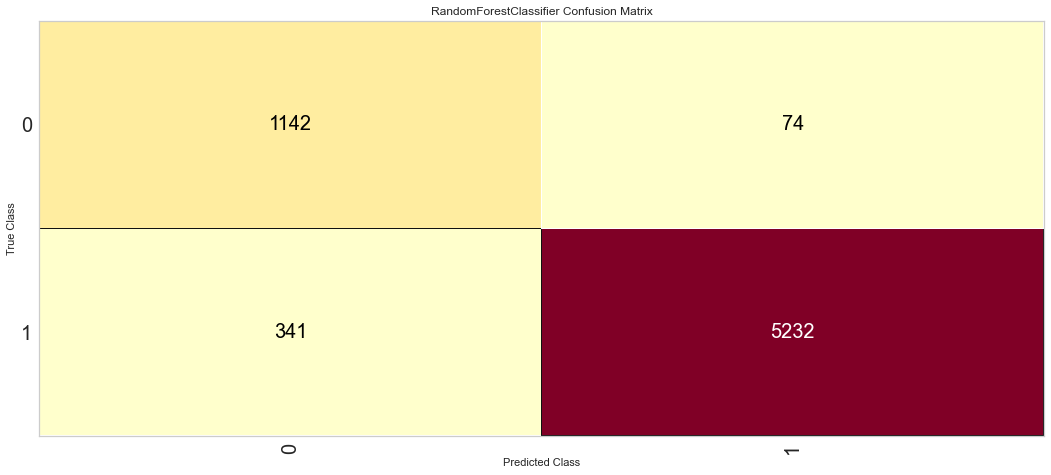

In [54]:
# Using Model as Random Forest Regression
# 15.	 Evaluation – Remember, we are trying to predict if a Recommended Ind is 0 or 1.  
# a.	Metrics for the evaluation:  
# i.	Confusion Matrix  (1142 + 5234 / 5576 + 1216) = 6373/6789 = 93.9% approx which is good
# ii.	Precision, Recall & F1 score (all 3 were very good) - both true and false predictions are better than logistic regression
# iii.	ROC curve (the dotted line is the randomly guessed so anything above that is good metric)
# Trying RandomForestClassifier
# Instantiate the classification model 
model_rf = RandomForestClassifier()
#The ConfusionMatrix visualizer taxes a model
classes = [0,1]
cm_rf = ConfusionMatrix(model_rf, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm_rf.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm_rf.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm_rf.ax.texts:
    label.set_size(20)

#How did we do?
cm_rf.show()

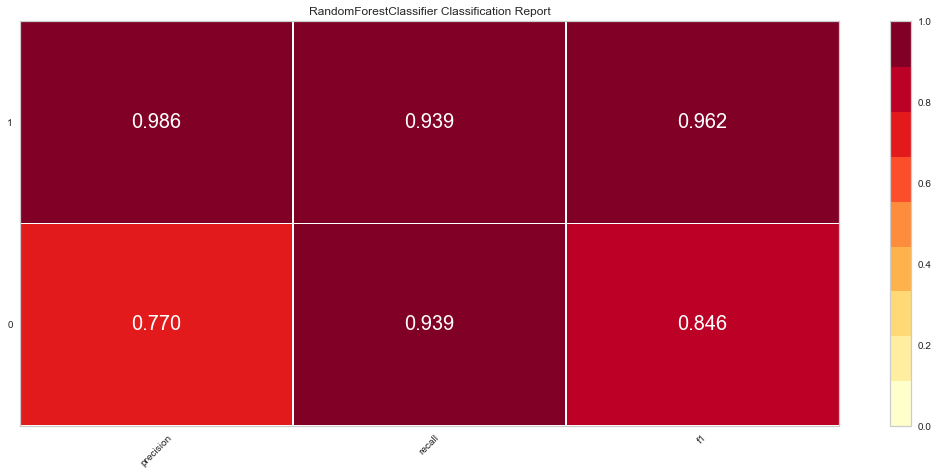

In [55]:
# Precision, Recall, and F1 Score - RandomForest
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model_rf, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.show()

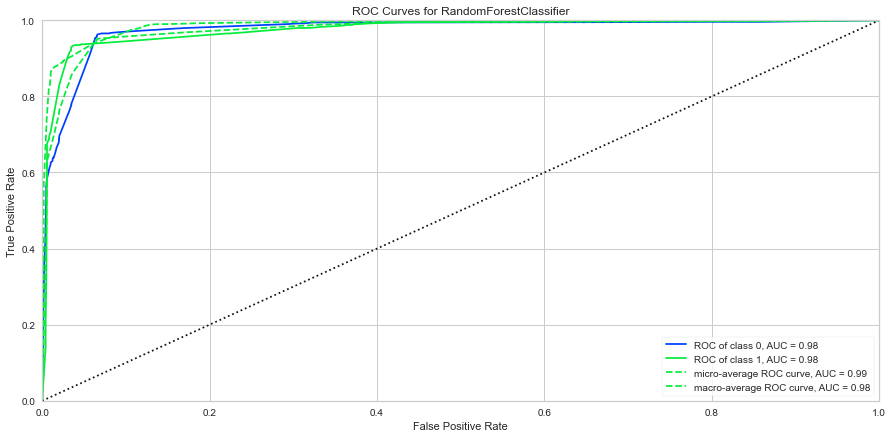

In [56]:
# ROC and AUC - RandomForest
#Instantiate the visualizer
visualizer = ROCAUC(model_rf)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.show()

In [57]:
# Showing both confusion matrix to see the percentage wise prediction accuracy on 
# True and False scenarions / Not Recommended  & Recommended

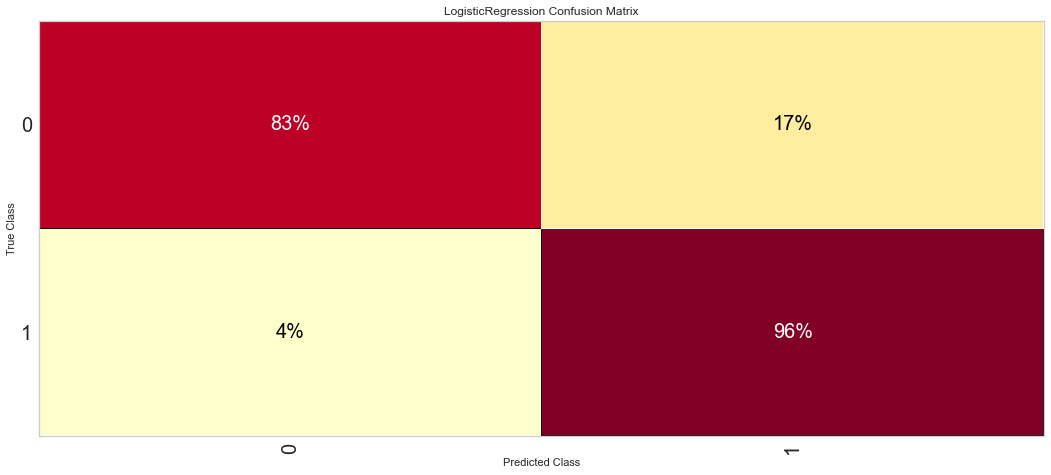

In [58]:
# If we check the accuracy scores for both Logistic Regression and Random Forest, they are close
#
cm_logit = ConfusionMatrix(model_logit, classes=classes, percent=True)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm_logit.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm_logit.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm_logit.ax.texts:
    label.set_size(20)

#How did we do?
cm_logit.show()


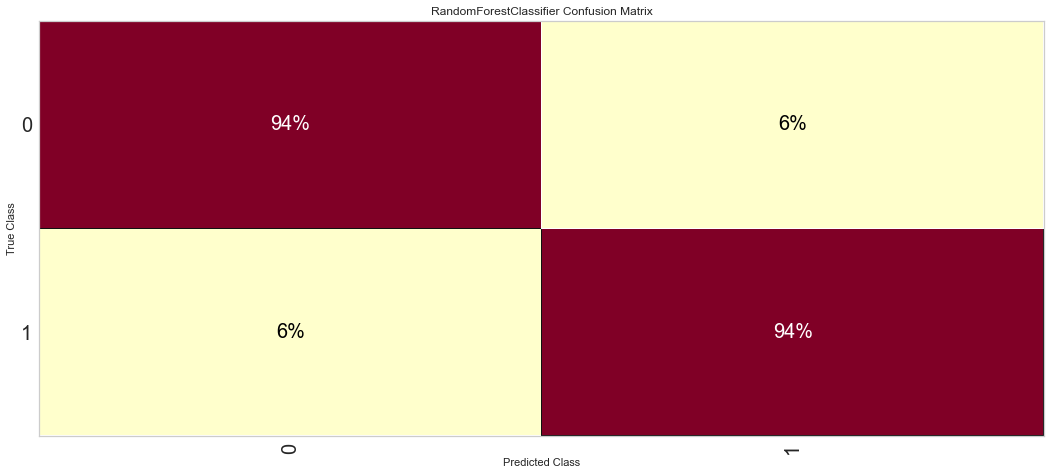

In [59]:
cm_rf = ConfusionMatrix(model_rf, classes=classes, percent=True)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm_rf.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm_rf.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm_rf.ax.texts:
    label.set_size(20)

#How did we do?
cm_rf.show()

In [ ]:
# So overall Random Forest Classifier seems more accurate overall
# It is also more accurate in false / not recommended cases
# However Logistic Regression has more accuracy in terms of True or Recommended Scenarios
# We may use both and based on what they recommend, can predict better

# Problem Statement - Original Case Study Analysis

Review and provide feedback to one of your classmate’s Case Study Part III assignment which are posted to the Case Study Part III discussion forum by the end of Week 9. Also review the feedback you receive on your Part III assignment. Make any changes you think necessary.

After reviewing your feedback and making any changes, post your entire case study (excluding code) to the Final Case Study discussion forum by the end of Week 10. 
Submit your entire case study via the submission link by the end of Week 10.
This is a cumulative project so it is imperative that you do not fall behind.

In [62]:
# Feedback Corrections
# These are updates for Part 3
# Changes include 
# 1. Added RandomSearch
# 2. Added GridSearch

#### Use RandomizedSearchCV to narrow down the range of hyperparameters

In [60]:
# Look at parameters used by our current random forest
from pprint import pprint

print('Parameters currently in use:\n')
pprint(model_rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [61]:
# Create parameter grid to sample
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [63]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = model_rf, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=2, random_state=0, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.5min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, verbose=2)

In [64]:
# View best parameters from fitting the random search
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

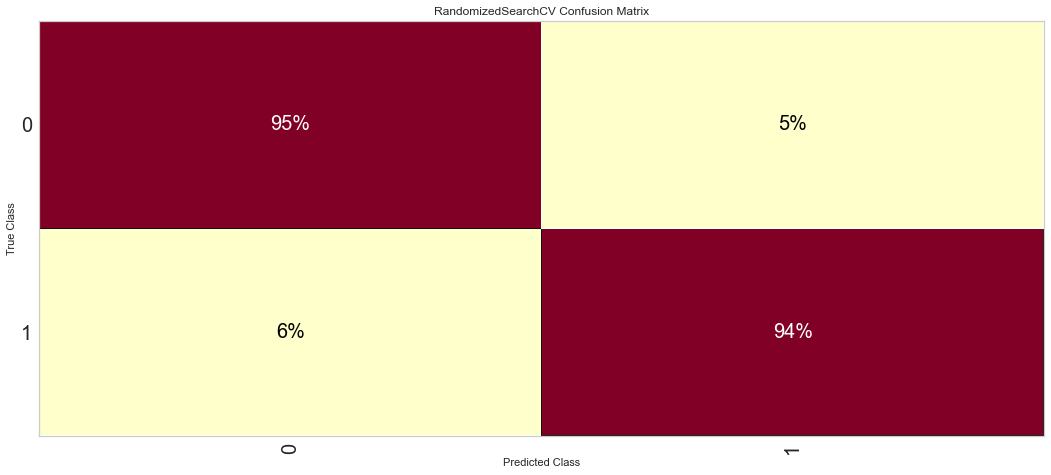

In [87]:
# Checking the accuracy of Model from Random Search
cm_rf_random = ConfusionMatrix(rf_random, classes=classes, percent=True)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm_rf_random.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm_rf_random.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm_rf_random.ax.texts:
    label.set_size(20)

#How did we do?
cm_rf_random.show()

# The accuracy seems to have slightly improved for the false scenarios

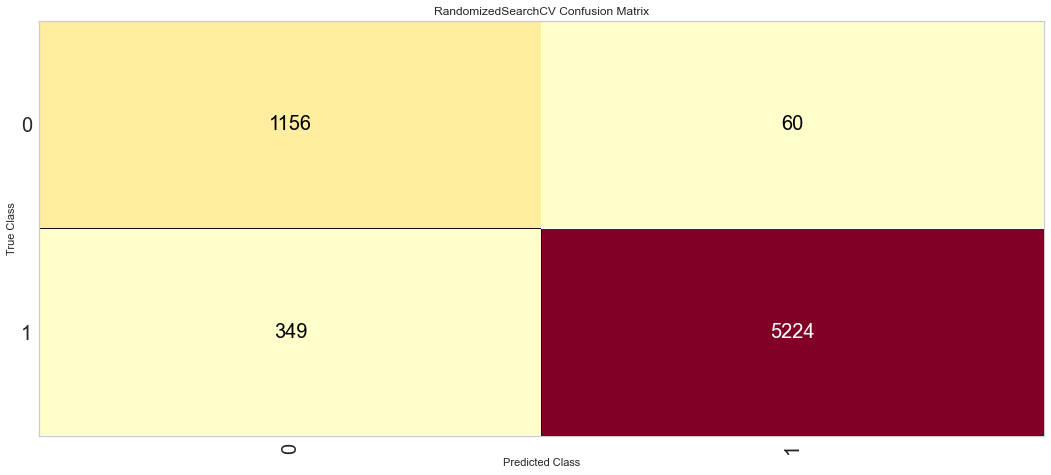

In [109]:
# Checking the accuracy(Exact Numbers rather than percent) of Model from Random Search
cm_rf_random = ConfusionMatrix(rf_random, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm_rf_random.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm_rf_random.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm_rf_random.ax.texts:
    label.set_size(20)

#How did we do?
cm_rf_random.show()

# The accuracy seems to have slightly improved for the false scenarios

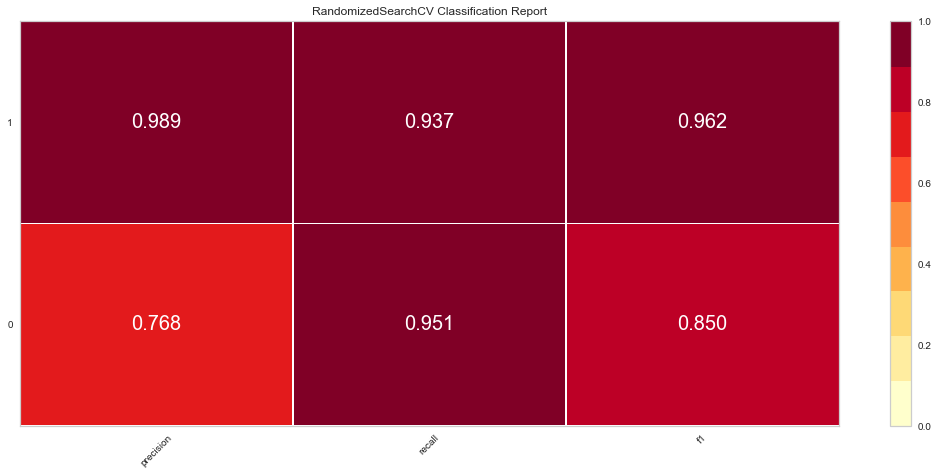

In [103]:
# Precision, Recall, and F1 Score - Random Search - outcome model
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(rf_random, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.show()

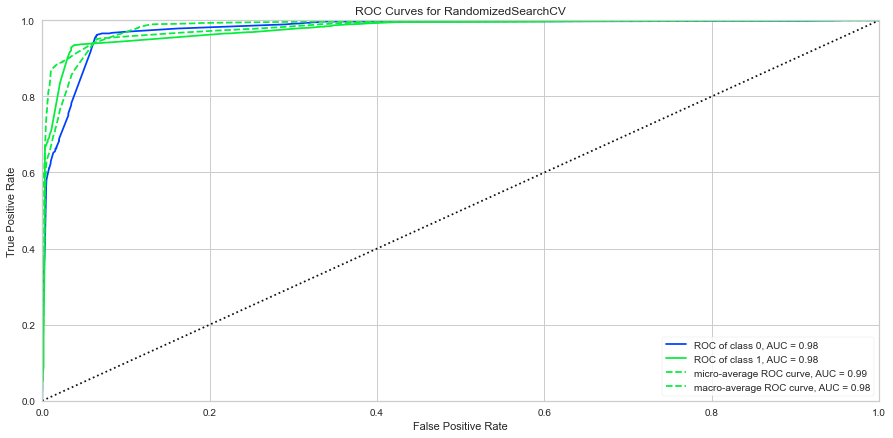

In [104]:
# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(rf_random)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.show()

In [101]:
# Use the parameter identified from random search to define ranges for grid search
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
                'bootstrap': [True, False],
                'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
                'max_features': ['auto', 'sqrt'],
                'min_samples_leaf': [1, 2, 4],
                'min_samples_split': [2, 5, 10],
                'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model_rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [102]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 46.4min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 58.0min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 71.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 85.7min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 101.9min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 119.5min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 138.5min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 158.6min
[Parallel(n_jobs=-1)]: Done 9097 tasks     

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

In [105]:
# Assigning Best Estimators 
# Then displaying CF matrix to check accuracy and see if it is better than the base model(96% accuracy)
best_grid = grid_search.best_estimator_

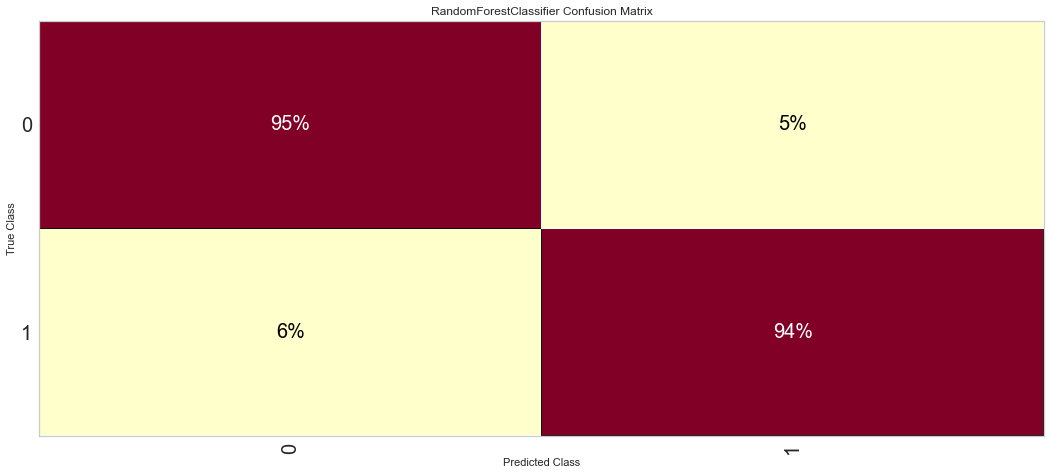

In [106]:
# Checking the accuracy of Model from Random Search
cm_best_grid = ConfusionMatrix(best_grid, classes=classes, percent=True)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm_best_grid.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm_best_grid.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm_best_grid.ax.texts:
    label.set_size(20)

#How did we do?
cm_best_grid.show()

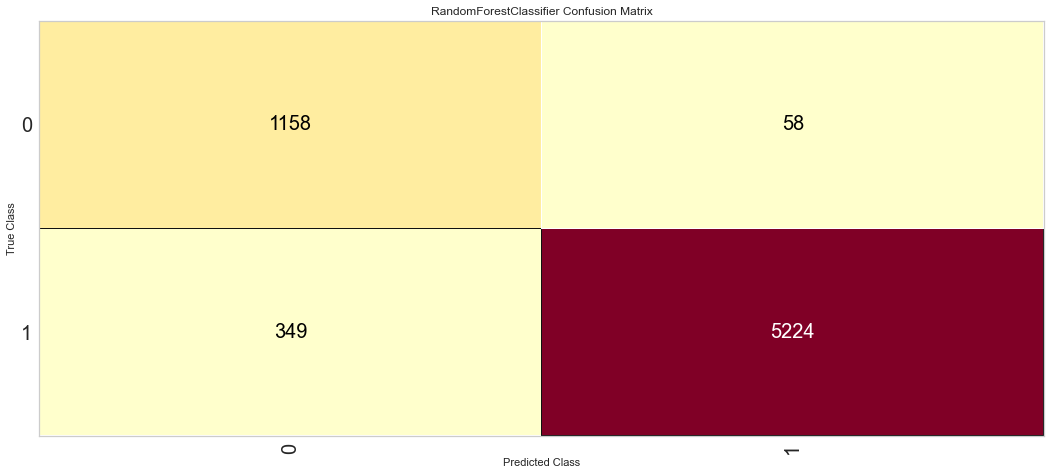

In [110]:
# Checking the accuracy of Model(Numbers) from Random Search
cm_best_grid = ConfusionMatrix(best_grid, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm_best_grid.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm_best_grid.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm_best_grid.ax.texts:
    label.set_size(20)

#How did we do?
cm_best_grid.show()

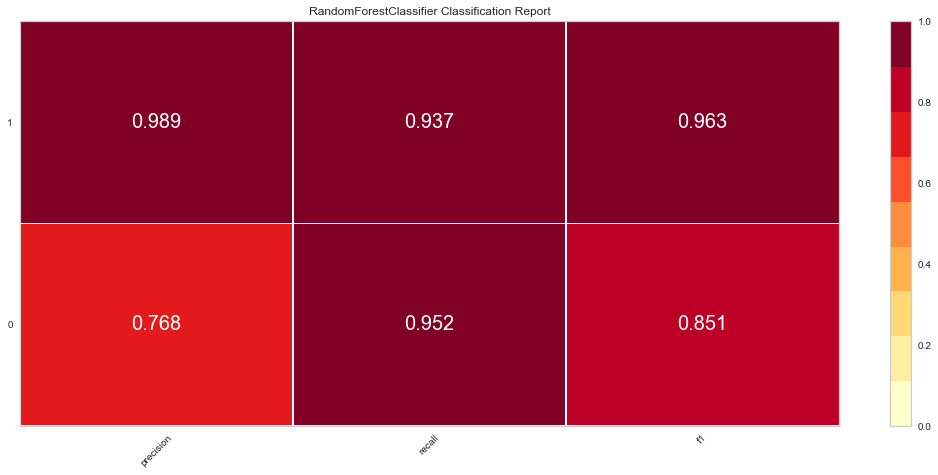

In [107]:
# Precision, Recall, and F1 Score - Grid Search - outcome model
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(best_grid, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.show()

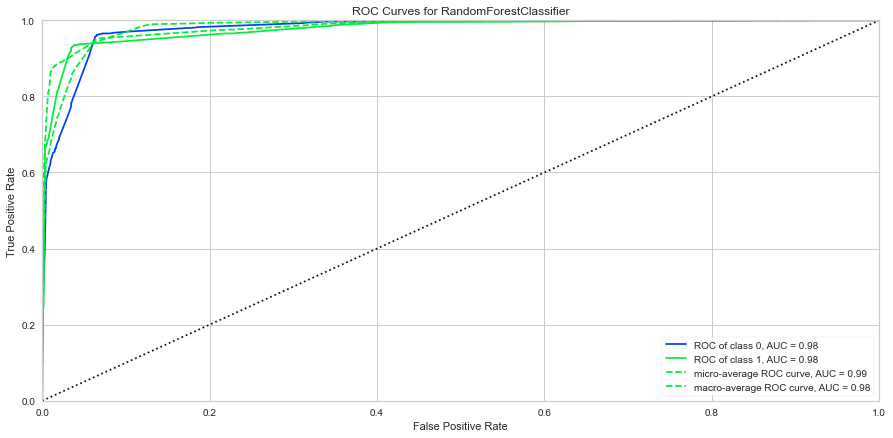

In [108]:
# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(best_grid)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.show()

# Problem Statement - Final Project - Original Case Study Final Documentation

Review and provide feedback to one of your classmate’s updated case study assignment which are posted to the Final Case Study discussion forum by the end of Week 11. Also review the feedback you receive on your own case study. Make any changes you think necessary.


Submit the final documentation for your Original Analysis Case Study via the assignment link by the end of Week 12. Your final documentation should include the data used in your case study, all code, your notebook (if applicable) and a final report. Think about the final report as a summary of your findings that you would present to your supervisor. The final report should include the following:

Introduction to the problem
Organized and detailed summary of the three parts of your case study (include any important visuals in here)
Conclusion: What does the analysis/model building tell you? Do you have a recommendation based on these findings?
There is no length restriction on the final report. However, it should be detailed enough that someone with reasonable domain knowledge could follow what you have done, but it should not include everything you have done. You want to include only the important details/visuals/findings in your report

### Summary
So, overall Random Forest Classifier seems more accurate overall(Accuracy of 93.9% for both True and False Scenarios) in comparison to Logistic Regression(which had overall accuracy of 93.5%). So we fed the same as base model for hyper parameter tuning. We finally were able to get a model with higher accuracy than the base model after using Random Search and Grid Search and the final model has an accuracy of 94.01% which is slightly higher than base model. We can use this model to predict whether a clothing product id is recommended or not.